# STOCK/CRPYTO PRICE PREDICTION MODEL

## The following code is an example on how to use simple data analysis tolls in order to set up a simple strategy for long and short term financial trading

### We will make use of the programing language python (3.x) which suits nicely for data anlysis

## --> This a very is simplified model for trading. One should always invest just as much money as one can afford to loose and do own studies in advance. 

## Required modules:
- numpy: the code is designed to be vectorized such that the numpy module can be used and calculations performed fast
- pandas: module for illustrative data frames
- yfinance: api module provided by yahoo finance to get current and previous asset prices
- matplotlib: (sub)module(s) for plots
- scipy: (sub)module for statistical and signal analysis

### CELLS YOU DO NOT NEED TO EXECUTE:

In [28]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### CELLS YOU CAN EXECUTE OPTIONALLY: 

#### --> This does not toggle the output of a cell:

In [29]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

### CELLS YOU NEED TO EXECUTE IN ORDER TO BE UP-TO-DATE:

In [30]:
your_path_to_folder_called_FINANCE = '###INSERT YOUR PATH HERE###'
import sys
sys.path.append(your_path_to_folder_called_FINANCE)

In [31]:
from model import MODEL
import utils, plotting, statistics
import pandas as pd

### CELLS YOU CAN MODIFY:

#### WARNING: Do not mix tickers from different markets/timezones. This can result in various NaN values if a filter is applied!

In [32]:
start_date = '2020-01-01' #your start date for the model.
day_hour = 18 #your intra-day time at which to evaluate the model.
tickers = ['BTC-USD', 'LTC-USD'] #your tickers of interest.
tickers = 'BTC-USD'

### The main part starts here:

In [33]:
model = MODEL(tickers=tickers)
model.get_data(start=start_date, interval='60m')
model.data.tail(2)

[*********************100%***********************]  1 of 1 completed


,BTC-USD
Datetime,
2020-05-24 20:00:00+01:00,8996.000977
2020-05-24 20:38:32+01:00,8995.434570


In [34]:
start_date_range = pd.Timestamp(2020, 1, 1, day_hour)
date_range = utils.create_date_range(start_date=start_date_range)
model.apply_date_filter(date_range)
model.data.tail()

[INFO]: filter applied.


,BTC-USD
Datetime,
2020-05-20 18:00:00+01:00,9528.734375
2020-05-21 18:00:00+01:00,9037.529297
2020-05-22 18:00:00+01:00,9194.690430
2020-05-23 18:00:00+01:00,9184.837891
2020-05-24 18:00:00+01:00,8961.804688


In [35]:
model.eval_model()

|                                  PRICE MODEL                                   |
|                                  Version 0.3                                   |
|                   Authors: Marco Rosenzweig & Patrick Lorenz                   |
----------------------------------------------------------------------------------
|                              ticker = ['BTC-USD']                              |
|                             start date = 01/01/20                              |
|                              end date = 05/24/20                               |
|                      initial investment per ticker = 200                       |
[INIT]: Initialising model for tickers: ['BTC-USD']
[INIT]: Successfully initialized model.
**********************************************************************************
[TICKER]: BTC-USD
[INFO]: No tax paid.
----------------------------------------------------------------------------------
[SUMMARY]: Average trade win: 6.3806570

[INFO]: New sell signal was detected for last value: 8961.8046875.


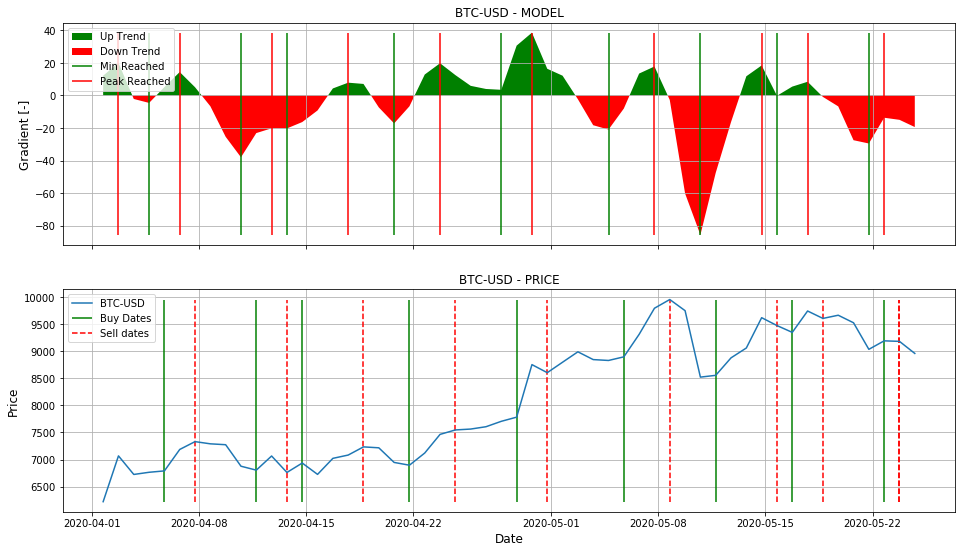

In [36]:
plotting.plot_model(model, tickers='BTC-USD', plot_from_date='2020-04-01')

In [37]:
imag_model = model.copy_model()
imag_model.append_timedelta(timedelta=1)
imag_model.comp_break_values(tickers='all', parallel_computing=True)
imag_model._init_model()

[INFO]: New data was appended.
[INFO]: Compute break values with 30.00% deviation
[INFO]: Current ticker: BTC-USD
[INFO]: Using 10 processes.
[INFO]: Current values: {'BTC-USD': 8961.8046875}
[INFO]: Break values: {'BTC-USD': array([8805.86928594, 8945.67343906])}
[INFO]: Tolerances: {'BTC-USD': array([-155.93540156,  -16.13124844])}
[INIT]: Initialising model for tickers: ['BTC-USD']
[INIT]: Successfully initialized model.
**********************************************************************************


[INFO]: Current ticker: BTC-USD
----------------------------------------------------------------------------------
[INFO]: Result for value: 8695.795919863609
[INFO]: New sell signal was detected for last value: 8695.795919863609.


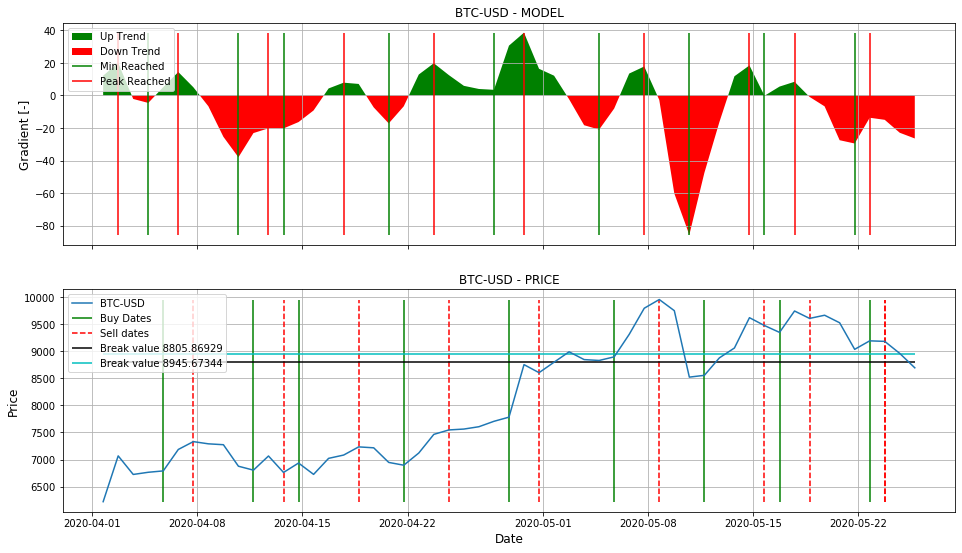

----------------------------------------------------------------------------------
[INFO]: Result for value: 8875.77136250034


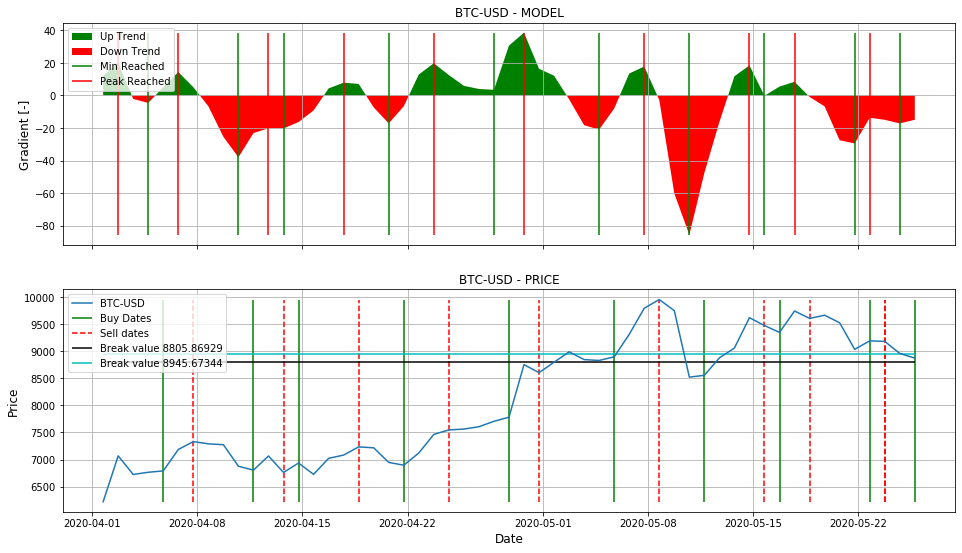

----------------------------------------------------------------------------------
[INFO]: Result for value: 9057.494357051133


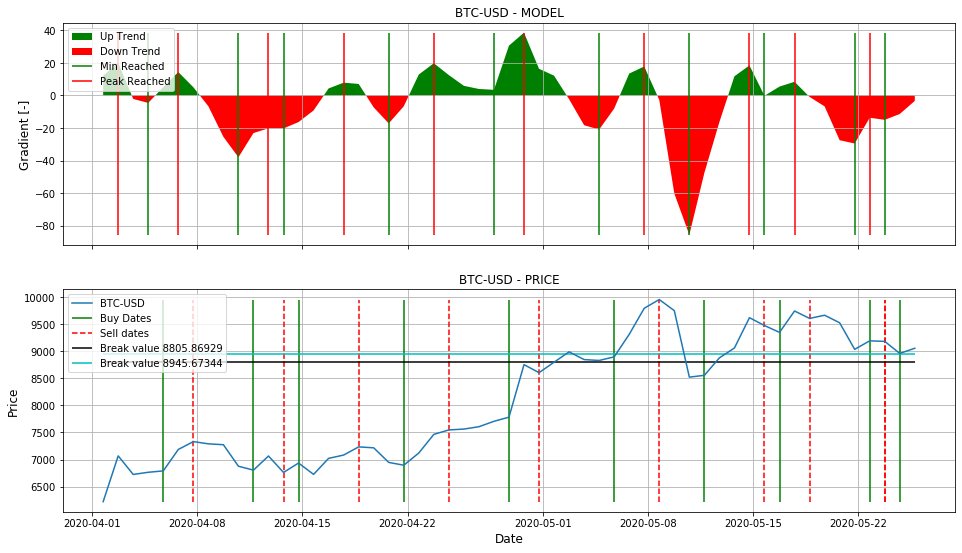

In [38]:
imag_model.show_possibilities(plot_from_date='2020-04-01', switch_axes=False)

[INFO]: Current ticker: BTC-USD
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Auto update of tolerances!
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Current value: 8996.5634765625!
[STATS-INFO]: New tolerances: [-190.69419062  -50.8900375 ]!
[STATS-EVAL]: Probability for tol=-190.69419: 25.16%
[STATS-EVAL]: Probability for tol=-50.89004: 42.42%
[STATS-EVAL]: Probability between: 17.26%


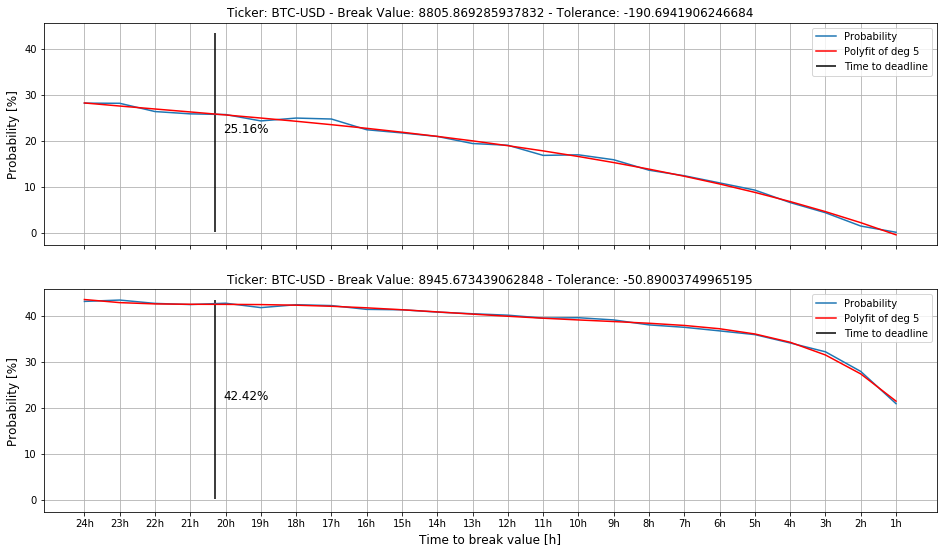

In [39]:
statistics.calc_probs(model=imag_model, tickers='all', auto_update_tolerances=True)

In [40]:
br = pd.read_csv('https://btc.com/stats/diff/export')
blocks = br['height']

In [41]:
halving_values = np.arange(1, 10)
halving_times = 210000
halvings = halving_times * halving_values

In [42]:
halving_values = np.arange(1, 10)
halving_times = 210000
halvings = halving_times * halving_values
#3 halvings
indices = np.zeros(4, dtype='int64')
for index in range(4):
    indices[index] = np.where(blocks < halvings[index])[0][-1]

In [43]:
rewards = np.empty_like(blocks, dtype='float64')
rewards[:indices[0]] = 50
rewards[indices[0]:indices[1]] = 25
rewards[indices[1]:indices[2]] = 12.5
rewards[indices[2]:] = 6.25

In [44]:
total_btc = rewards * blocks
total_btc[indices[0]:indices[1]] = 210000*50 + (blocks[indices[0]:indices[1]] - 210000)*rewards[indices[0]:indices[1]]
total_btc[indices[1]:indices[2]] = 210000*50 + 210000*25 + (blocks[indices[1]:indices[2]] - 420000)*rewards[indices[1]:indices[2]]
total_btc[indices[2]:] = 210000*50 + 210000*25 + 210000*12.5 + (blocks[indices[2]:] - 630000)*rewards[indices[2]:]

In [45]:
#subtract 1e6 satoshi btc
SF = (total_btc.values[total_btc.diff(26).dropna().shape[0]]-1e6) / total_btc.diff(26).dropna()

In [46]:
import math
s2f_model_price = math.exp(-1.84)* SF ** 3.36
sf_model = pd.DataFrame(data={'Stock to Flow':SF, 'Price':s2f_model_price})
sf_model

,Stock to Flow,Price
26,6.394078,80.967742
27,6.394078,80.967742
28,6.394078,80.967742
29,6.394078,80.967742
30,6.394078,80.967742
...,...,...
308,25.576313,8535.591088
309,25.576313,8535.591088
310,25.576313,8535.591088
311,25.332729,8265.508493


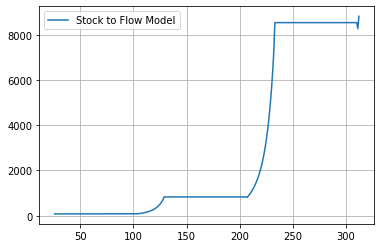

In [47]:
plt.plot(s2f_model_price, label='Stock to Flow Model')
plt.legend()
plt.grid()
plt.show()

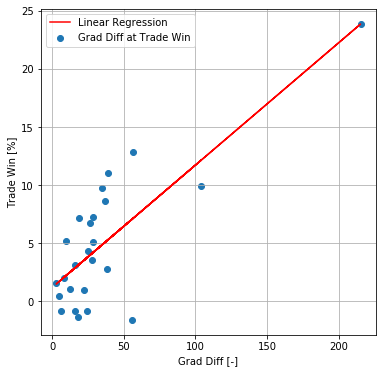

In [48]:
tickers = 'BTC-USD'
grad_at_sell = model.ticker_df[tickers]['Grad at Sell'].dropna().to_numpy()
max_length = grad_at_sell.shape[0]
grad_at_buy = model.ticker_df[tickers]['Grad at Buy'].to_numpy()[:max_length]
grad_diff = model.ticker_df[tickers]['Grad Difference'].to_numpy()[:max_length]
trade_efficiency = model.ticker_df[tickers]['Trade Efficiency'].to_numpy()[:max_length] * 100
#Get linear regression model
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(grad_diff, trade_efficiency)
#Plot stuff
plt.figure(figsize=(6, 6))
plt.scatter(grad_diff, trade_efficiency, label='Grad Diff at Trade Win')
plt.plot(grad_diff, grad_diff*slope + intercept, color='r', label='Linear Regression')
plt.xlabel('Grad Diff [-]')
plt.ylabel('Trade Win [%]')
plt.legend()
plt.grid()
plt.show()

In [49]:
#Create DataFrame of Interest
eval_df = pd.DataFrame(data={'Grad at Sell': grad_at_sell, 'Grad at Buy': grad_at_buy, \
                             'Grad Diff': grad_diff, 'Trade Efficiency': trade_efficiency})
eval_df

,Grad at Sell,Grad at Buy,Grad Diff,Trade Efficiency
0,0.161230,-4.725149,4.886379,0.445712
1,19.682528,-6.665266,26.347795,6.747150
2,-19.758499,-25.810406,6.051907,-0.783349
3,30.750973,-25.732715,56.483688,12.872234
4,10.051721,-18.503675,28.555396,5.097052
5,5.649834,2.761747,2.888087,1.610660
6,8.307034,-4.029026,12.336060,1.088832
7,5.979389,-32.141182,38.120572,2.820723
8,2.536179,-19.583788,22.119968,0.990926
9,26.201699,-29.460584,55.662283,-1.580049


In [50]:
#Stats of DataFrame
eval_df.describe()

,Grad at Sell,Grad at Buy,Grad Diff,Trade Efficiency
count,25.000000,25.000000,25.000000,25.000000
mean,15.176919,-19.892571,35.069490,4.889722
std,25.650901,30.216384,43.102063,5.762027
min,-20.185506,-111.648311,2.888087,-1.580049
25%,2.536179,-29.460584,15.825079,0.990926
50%,10.051721,-19.583788,24.820306,3.530434
75%,20.070197,-4.584577,36.958019,7.291363
max,103.418377,42.384155,215.066688,23.882560


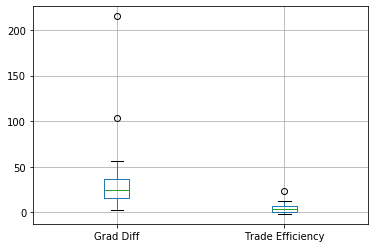

In [51]:
#Box Plots
eval_df.boxplot(column=['Grad Diff', 'Trade Efficiency'])

In [52]:
#Correlation Matrix
eval_df.corr()

,Grad at Sell,Grad at Buy,Grad Diff,Trade Efficiency
Grad at Sell,1.000000,-0.185007,0.724818,0.806060
Grad at Buy,-0.185007,1.000000,-0.811144,-0.438895
Grad Diff,0.724818,-0.811144,1.000000,0.787386
Trade Efficiency,0.806060,-0.438895,0.787386,1.000000


### Optional: Export model and eval DataFrame to csv file:

In [53]:
csv_name_model = 'OUTPUT/model_{}_{}_{}.csv'.format(tickers, start_date, day_hour)
model.ticker_df['BTC-USD'].to_csv(csv_name_model)

In [54]:
csv_name_eval = 'OUTPUT/eval_{}_{}_{}.csv'.format(tickers, start_date, day_hour)
eval_df.to_csv(csv_name_eval)